In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
fig=plt.figure()
import string
import random


In [149]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [150]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [151]:
#train.describe()

In [152]:
 train.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [153]:
#print test['Cabin']

In [154]:
train.Cabin = train.Cabin.fillna('N')
train.Cabin = train.Cabin.apply(lambda x: x[0])
test.Cabin = test.Cabin.fillna('N')
test.Cabin = test.Cabin.apply(lambda x: x[0])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,N,C


In [155]:
train['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [156]:
#sns.barplot(x="Survived", y="Age",hue="Sex", data=train);

In [157]:
#sns.barplot(x="Cabin", y="Pclass", data=train);


In [158]:
#sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train);


In [159]:
# majority embarked = Southampton
train.Embarked.fillna(value='S', inplace=True)

In [160]:
# create new column title containing title of every passenger
frames = [train,test]
for df in frames:
    df["Title"] = df.Name.str.replace('(.*, )|(\\..*)', '')

In [161]:
# Let's define another feature. FamilySize = Parch + SibSp + 1
for df in frames:
    df["FamilySize"] = df.Parch + df.SibSp + 1

In [162]:
train["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int64

In [163]:
train[np.isnan(train["Age"])].Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [164]:
# These can be discussed, of course.
titledict = {"Dr"   : "Mr",
             "Col"  : "Officer",
             "Mlle" : "Miss",
             "Major": "Officer",
             "Lady" : "Royal",
             "Dona" : "Royal",
             "Don"  : "Royal",
             "Mme"  : "Mrs",
             "the Countess": "Royal",
             "Jonkheer": "Royal",
             "Capt" : "Officer",
             "Sir"  : "Mr"
             }
#There is probably a pandas way to do this but i'll do this the python way
for df in frames:
    for key,val in titledict.items():
        train.loc[train["Title"]==key, "Title"] = val

In [165]:
train["Title"].value_counts()

Mr         525
Miss       184
Mrs        126
Master      40
Rev          6
Officer      5
Royal        4
Ms           1
Name: Title, dtype: int64

In [166]:
#sns.barplot(x="Title", y="Survived", data=train);

In [167]:
#sns.barplot(x="FamilySize", y="Survived", hue="Sex", data=train);

In [168]:
 train.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
FamilySize       0
dtype: int64

In [169]:
# capture digits and ignore the 1st digit part of text
train['tkno'] = train['Ticket'].str.extract('(\d\d+)', expand=True)
test['tkno'] = test['Ticket'].str.extract('(\d\d+)', expand=True)

#X_ = train.as_matrix()

#for i in range(X_.shape[0]):
   

#    tData = X_[i][8].split(' ')
#    print(tData)
#         print(tData)
#    if len(tData)>1:
#        X_[i][8] = int(tData[-1])
#    elif X_[i][8] == "LINE":
#       X_[i][8] = 0
#    else:
 #       X_[i][8] = int(X_[i][8])
    

#train['Ticket'] = X_[:,8]

In [170]:
#train['tkno'].value_counts()


In [171]:
#y_ = test.as_matrix()

#for i in range(y_.shape[0]):
   

#    tData = y_[i][7].split(' ')
#    print(tData)
#         print(tData)
#    if len(tData)>1:
#   elif y_[i][7] == "LINE":
#            y_[i][7] = 0
#    else:
#        y_[i][7] = int(y_[i][7])
    

#test['Ticket'] = y_[:,7]

In [172]:
# not much use as age of some children can be really small, so better use title for replacing missing values
#sns.barplot(x="FamilySize", y="Age", data=train);

In [173]:
# replacing missing age values by title median
for t in train[np.isnan(train["Age"])].Title.unique():
    for df in frames:
        df.loc[(df["Title"]==t) & np.isnan(df["Age"]), "Age" ] = train[train["Title"]==t].Age.median()

In [174]:
# no more missing values
train=train.dropna()
train.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
tkno           0
dtype: int64

In [175]:
#sns.barplot(x="Cabin", y="Age", data=train);

In [176]:
del train['Name']

In [177]:
del test['Name']

In [178]:
del train['Parch']

In [179]:
del test['Parch']

In [180]:
del train['SibSp']

In [181]:
del test['SibSp']

In [182]:
del train['Ticket']

In [183]:
del test['Ticket']

In [184]:
 test.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId    0
Pclass         0
Sex            0
Age            1
Fare           1
Cabin          0
Embarked       0
Title          0
FamilySize     0
tkno           2
dtype: int64

In [185]:
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [186]:
 test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [187]:
test=test.fillna('0')

In [188]:
 test.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
tkno           0
dtype: int64

In [189]:
train['Age*Class']=train['Age']*train['Pclass']
test['Age*Class']=test['Age']*test['Pclass']

/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [190]:
#train['Fare_Per_Person']=train['Fare']/(train['FamilySize']+1)
#test['Fare_Per_Person']=test['Fare']/(test['FamilySize']+1)

In [191]:
Ticket_count = dict(train['tkno'].value_counts())

In [192]:
def Tix_ct(y):
    return Ticket_count[y]
train["TicketGrp"] = train.tkno.apply(Tix_ct)
def Tix_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

train["TicketGrp"] = train.loc[:,"TicketGrp"].apply(Tix_label)  

/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [193]:
Ticket_count = dict(test['tkno'].value_counts())

In [194]:
def Tix_ct(y):
    return Ticket_count[y]
test["TicketGrp"] = test.tkno.apply(Tix_ct)
def Tix_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

test["TicketGrp"] = test.loc[:,"TicketGrp"].apply(Tix_label)  

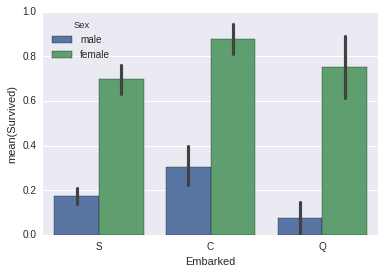

In [195]:
sns.barplot(x="Embarked", y="Survived",hue='Sex', data=train);

In [196]:
from sklearn import preprocessing
def encode_features(train, test):
    features = [ 'Sex','Cabin','Embarked','Title']
    df_combined = pd.concat([train[features], test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        train[feature] = le.transform(train[feature])
        test[feature] = le.transform(test[feature])
    return train, test
    
data_train, data_test = encode_features(train, test)
data_train.head()

/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize,tkno,Age*Class,TicketGrp
0,1,0,3,1,22.0,7.2500,7,2,5,2,21171,66.0,1
1,2,1,1,0,38.0,71.2833,2,0,6,2,17599,38.0,1
2,3,1,3,0,26.0,7.9250,7,2,4,1,3101282,78.0,1
3,4,1,1,0,35.0,53.1000,2,2,6,2,113803,35.0,2
4,5,0,3,1,35.0,8.0500,7,2,5,1,373450,105.0,1


In [197]:
#train['cab']=[float('NaN') if x == 7 else x for x in train['Cabin']]
#test['cab']=[float('NaN') if x == 7 else x for x in test['Cabin']]

In [198]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0

train["Fam"] = train.loc[:,"FamilySize"].apply(Fam_label)
test["Fam"] = test.loc[:,"FamilySize"].apply(Fam_label)

/home/mahir/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [199]:
del train['tkno']
del test['tkno']
#del train['Embarked']
#del test['Embarked']
#del train['TicketGrp']
#del test['TicketGrp']
#del train['Fam']
#del test['Fam']
del train['Age*Class']
del test['Age*Class']
#del train['Cabin']
#del test['Cabin']
#del train['Title']
#del test['Title']
#del train['Pclass']
#del test['Pclass']
del train['FamilySize']
del test['FamilySize']
#del train['Fare']
#del test['Fare']

In [200]:
#train['fam'].value_counts()

In [201]:
test.apply(lambda x: sum(x.isnull()),axis=0)

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
TicketGrp      0
Fam            0
dtype: int64

In [202]:
#cols = ["PassengerId","Survived","Pclass","Sex","Age","Fare","Embarked","Title","FamilySize","Age*Class","cab"]
#cols1 = ["PassengerId","Pclass","Sex","Age","Fare","Embarked","Title","FamilySize","Age*Class","cab"]
#impData = train[cols]
#impData1=test[cols1]
#impData = impData.as_matrix()
#impData1=impData1.as_matrix()

In [203]:
#for j in range(impData.shape[1]):
#    count = 0
#    for i in range(impData.shape[0]):
#        if np.isnan(impData[i][j]) :
#            
#            count = count + 1
#    print(count)

In [204]:
#from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
#for i in range(4):
#    X_incomplete = impData[i*200:(i+1)*200,:11]
#    impData[i*200:(i+1)*200,:11] = KNN(k=3).complete(X_incomplete)

In [205]:


#X_incomplete = impData[800:,:11]
#impData[800:,:11] = KNN(k=6).complete(X_incomplete)

#for j in range(impData.shape[1]):
#    count = 0
#    for i in range(impData.shape[0]):
#        if np.isnan(impData[i][j]) :
#            
#            count = count + 1
#    print(count)

In [206]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,TicketGrp,Fam
0,1,0,3,1,22.0,7.2500,7,2,5,1,2
1,2,1,1,0,38.0,71.2833,2,0,6,1,2
2,3,1,3,0,26.0,7.9250,7,2,4,1,1
3,4,1,1,0,35.0,53.1000,2,2,6,2,2
4,5,0,3,1,35.0,8.0500,7,2,5,1,1
5,6,0,3,1,30.0,8.4583,7,1,5,1,1
6,7,0,1,1,54.0,51.8625,4,2,5,1,1
7,8,0,3,1,2.0,21.0750,7,2,3,2,1
8,9,1,3,0,27.0,11.1333,7,2,6,2,2
9,10,1,2,0,14.0,30.0708,7,0,6,2,2


In [207]:
#train['cab']=impData[:,10]

In [208]:
#train['cab']=train['cab'].astype(int)

In [209]:
#for i in range(2):
#    X_incomplete = impData1[i*200:(i+1)*200,:10]
#    impData1[i*200:(i+1)*200,:10] = KNN(k=3).complete(X_incomplete)
    
#X_incomplete = impData1[400:,:10]
#impData1[400:,:10] = KNN(k=3).complete(X_incomplete)

#for j in range(impData1.shape[1]):
#    count = 0
#    for i in range(impData1.shape[0]):
#        if np.isnan(impData1[i][j]) :
#           
#            count = count + 1
#    print(count)

#test['cab']=impData1[:,9]   
#test['cab']=test['cab'].astype(int)

In [210]:
from sklearn.cross_validation import train_test_split

X_all = train.drop(['Survived', 'PassengerId'], axis=1)
y_all = train['Survived']

num_test = 0.0
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [211]:
#test.head()

In [212]:
#X_test

In [213]:
#y_test

In [214]:
from sklearn.neural_network import MLPClassifier
c = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15), random_state=1,activation='logistic',max_iter=3000)
c.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=15, learning_rate='constant',
       learning_rate_init=0.001, max_iter=3000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [215]:
#from sklearn.ensemble import AdaBoostClassifier
#c=AdaBoostClassifier(base_estimator=clf,n_estimators=25,learning_rate=0.015)
#c.fit(X_train, y_train)

In [216]:
#from sklearn.metrics import make_scorer, accuracy_score
#predictions = c.predict(X_test)
#print(accuracy_score(y_test, predictions))

In [217]:
c.score(X_train,y_train)

0.86553672316384178

In [219]:
#c.score(X_test,y_test)

In [220]:
X_train.axes

[Int64Index([141, 112, 157, 661, 228, 261, 655, 393,  63, 208,
             ...
             606,  39, 350, 463, 238,  31, 491,  40, 746, 599],
            dtype='int64', length=885),
 Index([u'Pclass', u'Sex', u'Age', u'Fare', u'Cabin', u'Embarked', u'Title',
        u'TicketGrp', u'Fam'],
       dtype='object')]

In [221]:
#c.feature_importances_

In [222]:
ids = test['PassengerId']
predictions = c.predict(test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions13.csv', index = False)
